In [86]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib notebook

csvpath = "Resources\CensusData.csv"

sales_df = pd.DataFrame(pd.read_csv(csvpath))
sales_df.head()

,Year,Houses Sold
0,1963,560000
1,1964,565000
2,1965,575000
3,1966,461000
4,1967,487000


In [104]:
csvpath2= "Resources\FedData.csv"
rate_df = pd.DataFrame(pd.read_csv(csvpath2))
rate_df
unemploy_rate= rate_df.groupby(["Year"]).mean()['Unemployment Rate']
unemploy_rate_df = pd.DataFrame(unemploy_rate)
unemploy_rate_df = unemploy_rate_df.drop([1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979])
unemploy_rate_df.head()

,Unemployment Rate
Year,
1980,7.175000
1981,7.616667
1982,9.708333
1983,9.600000
1984,7.508333


In [105]:
sales_unemploy_df = pd.merge(sales_df,unemploy_rate_df, on="Year", how="outer")
sales_unemploy_df=sales_unemploy_df.rename(index=str, columns={'Unemployment Rate': 'National Unemployment Rate'})
sales_unemploy_df.head()

,Year,Houses Sold,National Unemployment Rate
0,1963,560000,NaN
1,1964,565000,NaN
2,1965,575000,NaN
3,1966,461000,NaN
4,1967,487000,NaN


In [106]:
csvpath3="Resources\FLUnemploymentData.csv"
fl_data = pd.DataFrame(pd.read_csv(csvpath3))
fl_data = fl_data[["Year", "Unemployment Rate"]]
fl_data.head()

,Year,Unemployment Rate
0,1980,6.1
1,1981,6.7
2,1982,8.4
3,1983,8.5
4,1984,6.4


In [107]:
add_fl_df = pd.merge(sales_unemploy_df, fl_data, on="Year", how="outer")
add_fl_df = add_fl_df.rename(index=str, columns={'Unemployment Rate': 'Florida Unemployment Rate'})
add_fl_df.head()

,Year,Houses Sold,National Unemployment Rate,Florida Unemployment Rate
0,1963,560000,NaN,NaN
1,1964,565000,NaN,NaN
2,1965,575000,NaN,NaN
3,1966,461000,NaN,NaN
4,1967,487000,NaN,NaN


In [108]:
csvpath4 = "Resources\CAUnemploymentData.csv"
ca_data = pd.DataFrame(pd.read_csv(csvpath4))
ca_data = ca_data[["Year", "Unemployment Rate"]]
ca_data.head()

,Year,Unemployment Rate
0,1980,6.8
1,1981,7.4
2,1982,10.0
3,1983,9.8
4,1984,7.8


In [112]:
ca_fl_unemploy_data = pd.merge(add_fl_df, ca_data, on="Year", how="outer")
ca_fl_unemploy_data = ca_fl_unemploy_data.rename(index=str, columns={'Unemployment Rate': 'California Unemployment Rate'})
ca_fl_unemploy_data

,Year,Houses Sold,National Unemployment Rate,Florida Unemployment Rate,California Unemployment Rate
0,1963,560000,NaN,NaN,NaN
1,1964,565000,NaN,NaN,NaN
2,1965,575000,NaN,NaN,NaN
3,1966,461000,NaN,NaN,NaN
4,1967,487000,NaN,NaN,NaN
5,1968,490000,NaN,NaN,NaN
6,1969,448000,NaN,NaN,NaN
7,1970,485000,NaN,NaN,NaN
8,1971,656000,NaN,NaN,NaN
9,1972,718000,NaN,NaN,NaN


<IPython.core.display.Javascript object>


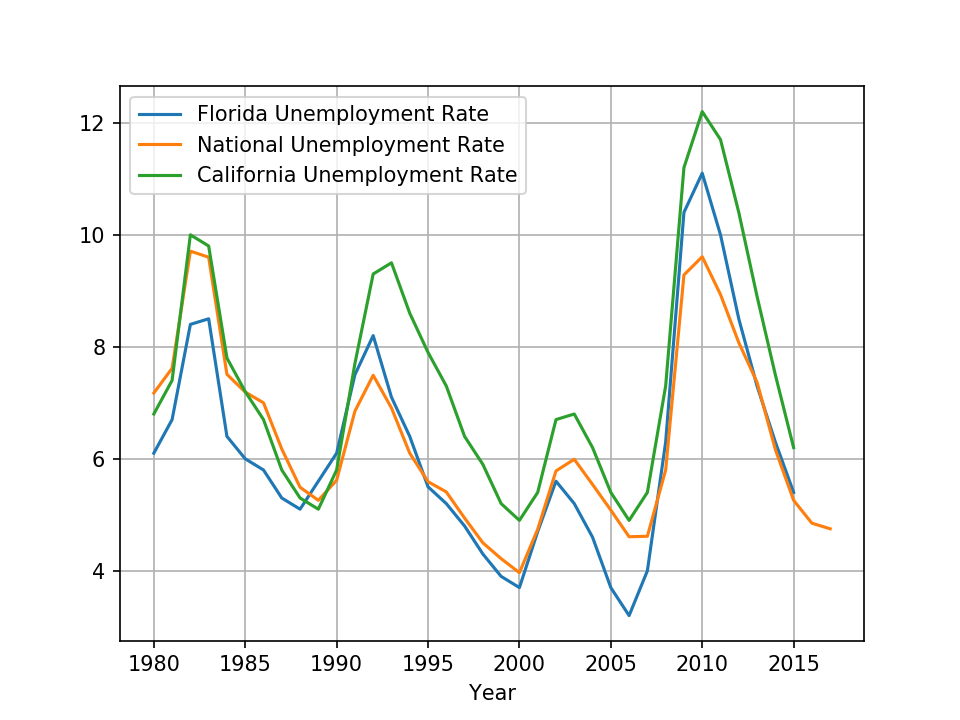

In [116]:

ca_fl_unemploy_data.plot("Year", ["Florida Unemployment Rate","National Unemployment Rate", "California Unemployment Rate"], kind="line")
plt.grid()
